In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
# Пути
MODEL_PATH = './models/final_model.h5'
BASE_DIR = './flowers'
TARGET_SIZE = (150, 150)
BATCH_SIZE = 32
CLASSES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Загрузка модели
model = load_model(MODEL_PATH)

In [9]:
# Подготовка тестового датасета
df = pd.DataFrame(columns=['image_path', 'label'])
for label in CLASSES:
    folder = os.path.join(BASE_DIR, label)
    for fname in os.listdir(folder):
        df = pd.concat([df, pd.DataFrame([{
            'image_path': os.path.join(folder, fname),
            'label': label
        }])], ignore_index=True)

df.head()

,image_path,label
0,./flowers\daisy\100080576_f52e8ee070_n.jpg,daisy
1,./flowers\daisy\10140303196_b88d3d6cec.jpg,daisy
2,./flowers\daisy\10172379554_b296050f82_n.jpg,daisy
3,./flowers\daisy\10172567486_2748826a8b.jpg,daisy
4,./flowers\daisy\10172636503_21bededa75_n.jpg,daisy


In [11]:
from sklearn.model_selection import train_test_split
_, test_df = train_test_split(df, test_size=0.3, random_state=42)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1296 validated image filenames belonging to 5 classes.


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step
Отчет по классификации
              precision    recall  f1-score   support

       daisy       0.66      0.81      0.73       244
   dandelion       0.88      0.71      0.79       333
        rose       0.69      0.52      0.59       234
   sunflower       0.78      0.79      0.79       203
       tulip       0.65      0.79      0.71       282

    accuracy                           0.73      1296
   macro avg       0.73      0.73      0.72      1296
weighted avg       0.74      0.73      0.73      1296



<function matplotlib.pyplot.show(close=None, block=None)>

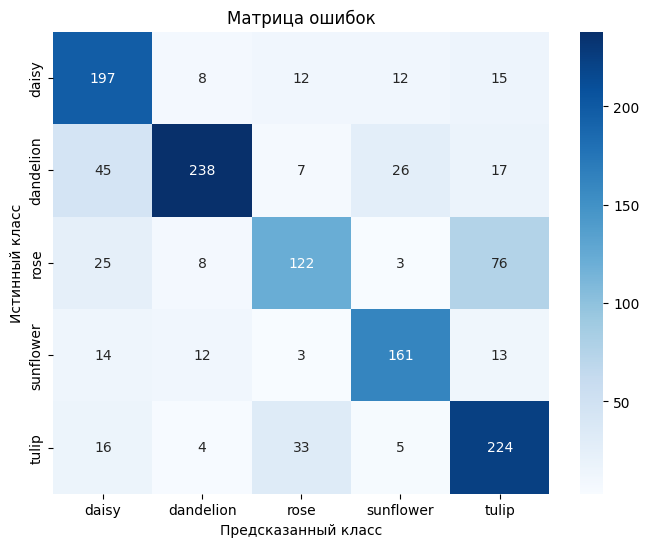

In [15]:
# Предсказания
y_probs = model.predict(test_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Метрики
print('Отчет по классификации')
print(classification_report(y_true, y_pred, target_names=class_labels))

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show